In [1]:
import DatasetPrepare
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
# get Envi dataset
df = pd.DataFrame(DatasetPrepare.getFujiDatasets())
df = df.sort_values(by=['Date'])

In [3]:
# mape function
def mape(y_true, y_pred):
    return round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100, 2)

In [4]:
# add target by shift Envi column
observation = 5
for i in range(1, observation + 1):
    if(i == observation):
        df['y'] = df['Fuji'].shift(int(i) * -1)
        break

    df['x' + str(i)] = df['Fuji'].shift(int(i) * -1)

df = df.drop(df.tail(observation + 1).index)
df

,Date,Fuji,x1,x2,x3,x4,y
103,2015-01-04,23821.0,18958.0,18702.0,18718.0,31583.0,17163.0
102,2015-01-11,18958.0,18702.0,18718.0,31583.0,17163.0,17420.0
101,2015-01-18,18702.0,18718.0,31583.0,17163.0,17420.0,18325.0
100,2015-01-25,18718.0,31583.0,17163.0,17420.0,18325.0,21184.0
99,2015-02-01,31583.0,17163.0,17420.0,18325.0,21184.0,15789.0
...,...,...,...,...,...,...,...
3319,2018-01-14,60229.0,56732.0,37574.0,55158.0,39349.0,30083.0
3318,2018-01-21,56732.0,37574.0,55158.0,39349.0,30083.0,35084.0
3317,2018-01-28,37574.0,55158.0,39349.0,30083.0,35084.0,37136.0
3316,2018-02-04,55158.0,39349.0,30083.0,35084.0,37136.0,36357.0


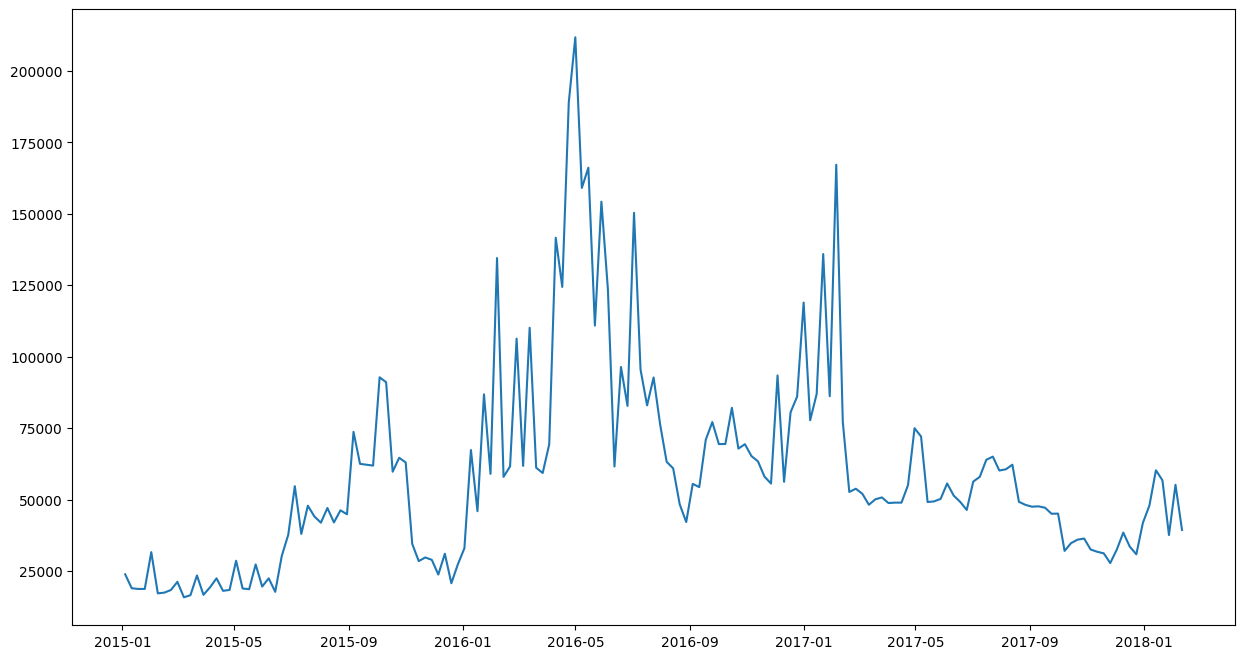

In [5]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)

plt.plot(df['Date'], df['Fuji'])
plt.show()

In [6]:
#split train test
X = np.array(df.drop(columns='y'))
y = np.array(df[['Date', 'y']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

X_train = np.array(sorted(X_train, key=lambda x: x[0]))
X_test = np.array(sorted(X_test, key=lambda x: x[0]))
y_train = np.array(sorted(y_train, key=lambda x: x[0]))
y_test = np.array(sorted(y_test, key=lambda x: x[0]))


In [7]:
#baseline model
baseline_pred = []

for i in X_test[:,1:]:
    baseline_pred.append(np.mean(i))

baseline_mae = mean_absolute_error(y_test[:,1:], baseline_pred)
baseline_mse = mean_squared_error(y_test[:,1:], baseline_pred)
baseline_r2 = r2_score(y_test[:,1:], baseline_pred)
baseline_mape = mape(y_test[:,1:], baseline_pred)

In [8]:
# implement random forest regression
from sklearn.ensemble import RandomForestRegressor

randomForest=RandomForestRegressor()

randomForest.fit(X_train[:, 1:],y_train[:, 1:])

ran_pred = randomForest.predict(X_test[:, 1:])

random_mae = mean_absolute_error(y_test[:, 1:], ran_pred)
random_mse = mean_squared_error(y_test[:, 1:], ran_pred)
random_r2 = r2_score(y_test[:, 1:], ran_pred)
random_mape = mape(y_test[:, 1:], ran_pred)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [9]:
# implement Gradient boosting regression
from sklearn.ensemble import GradientBoostingRegressor

gradientBoosting=GradientBoostingRegressor()

gradientBoosting.fit(X_train[:, 1:], y_train[:, 1:])

gradient_pred = gradientBoosting.predict(X_test[:, 1:])

gradient_mae = mean_absolute_error(y_test[:, 1:], gradient_pred)
gradient_mse = mean_squared_error(y_test[:, 1:], gradient_pred)
gradient_r2 = r2_score(y_test[:, 1:], gradient_pred)
gradient_mape = mape(y_test[:, 1:], gradient_pred)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
# implement AdaBoost regression
from sklearn.ensemble import AdaBoostRegressor
adaBoost=AdaBoostRegressor()

adaBoost.fit(X_train[:, 1:], y_train[:, 1:])

ada_pred = adaBoost.predict(X_test[:, 1:])

ada_mae = mean_absolute_error(y_test[:, 1:], ada_pred)
ada_mse = mean_squared_error(y_test[:, 1:], ada_pred)
ada_r2 = r2_score(y_test[:, 1:], ada_pred)
ada_mape = mape(y_test[:, 1:], ada_pred)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


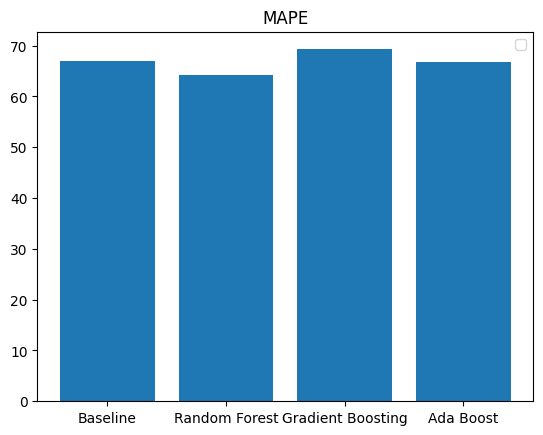

In [11]:
x = np.array(["Baseline", "Random Forest", "Gradient Boosting", "Ada Boost"])
y = np.array([baseline_mape,random_mape, gradient_mape, ada_mape])

plt.bar(x,y)
plt.title('MAPE')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


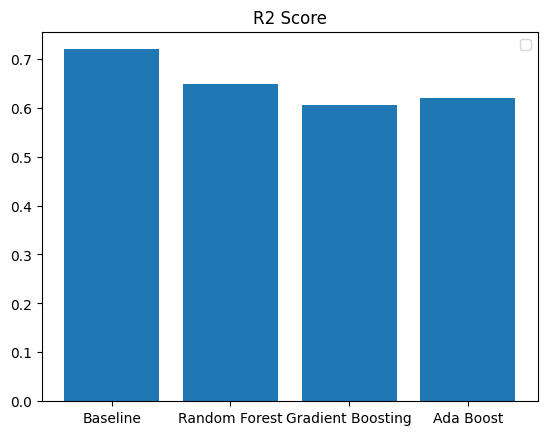

In [12]:
x = np.array(["Baseline","Random Forest", "Gradient Boosting", "Ada Boost"])
y = np.array([baseline_r2,random_r2, gradient_r2, ada_r2])

plt.bar(x,y)
plt.title('R2 Score')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


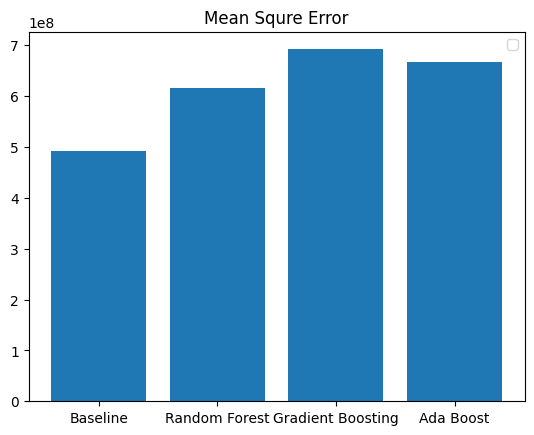

In [13]:
x = np.array(["Baseline","Random Forest", "Gradient Boosting", "Ada Boost"])
y = np.array([baseline_mse,random_mse, gradient_mse, ada_mse])

plt.bar(x,y)
plt.title('Mean Squre Error')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


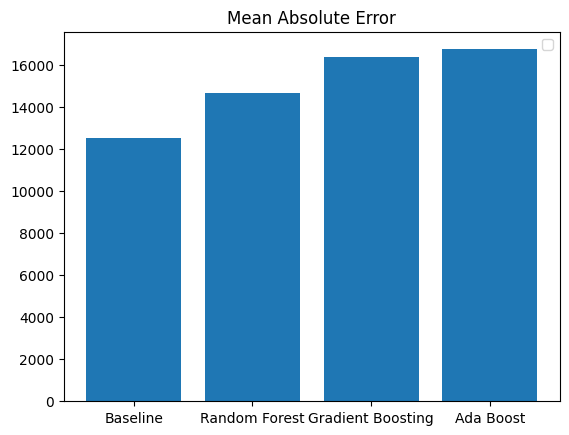

In [14]:
x = np.array(["Baseline","Random Forest", "Gradient Boosting", "Ada Boost"])
y = np.array([baseline_mae,random_mae, gradient_mae, ada_mae])

plt.bar(x,y)
plt.title('Mean Absolute Error')
plt.legend()
plt.show()

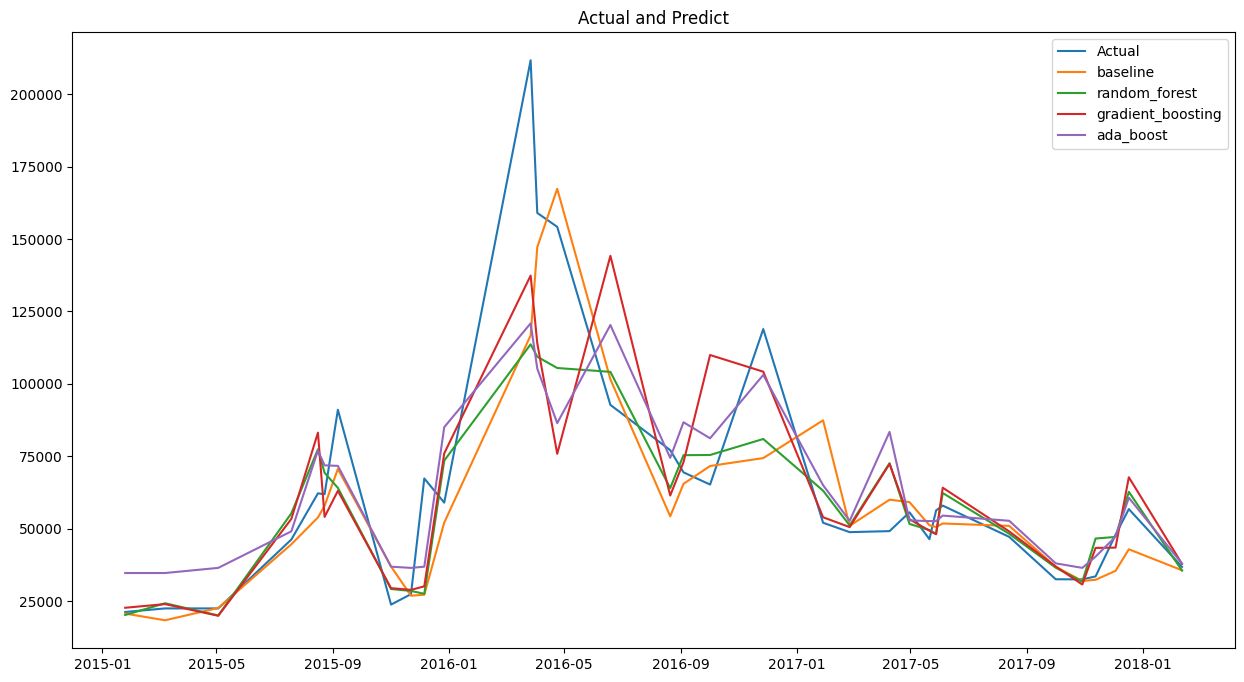

In [15]:
#predict and actual
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)

plt.plot(X_test[:, :1], y_test[:, 1:], label='Actual')
plt.plot(X_test[:, :1], baseline_pred, label='baseline')
plt.plot(X_test[:, :1], ran_pred, label='random_forest')
plt.plot(X_test[:, :1], gradient_pred, label='gradient_boosting')
plt.plot(X_test[:, :1], ada_pred, label='ada_boost')
plt.title('Actual and Predict')
plt.legend()
plt.show()